#### Lesson 6. Classify and Plot Raster Data in Python
**In This Lesson**
- Learning Objectives
- What You Need
- Raster Classification Steps
- Map Raster Values to New Values
- Add Custom Legend

**Learning Objectives**

After completing this tutorial, you will be able to:

- Reclassify a raster dataset in Python using a set of defined values and np.digitize
- Explore a raster and produce histograms to help define appropriate raster break points for classification

**Manually Reclassifying Raster Data**

In this lesson, you will learn how to reclassify a raster dataset in Python. When you reclassify a raster, you create a new raster object / file that can be exported and shared with colleagues and / or open in other tools such as QGIS. In that raster each pixel is mapped to a new value based on some approach. This approach can vary depending upon your science question.

![Reclassify Raster Image](http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/geoprocessing_with_3d_analyst/Reclass_Reclass2.gif)
When you reclassify a raster, you create a new raster. In that raster, each cell from the old raster is mapped to the new raster. The values in the new raster are applied using a defined range of values or a raster map. For example above you can see that all cells that contains the values 1-3 are assigned the new value of 5. Image source: ESRI.

##### Raster Classification Steps

You can break your raster processing workflow into several steps as follows:

- Data import / cleanup: load and “clean” the data. This includes cropping, removing with nodata values
- Data Exploration: understand the range and distribution of values in your data. This may involve plotting histograms and scatter plots to determine what classes are appropriate for our data
- Reclassify the Data: Once you understand the distribution of your data, you are ready to reclassify. There are statistical and non-statistical approaches to reclassification. Here you will learn how to manuall reclassify a raster using bins that you define in your data exploration step.

Please note - working with data is not a linear process. Above you see a potential workflow. You will develop your own workflow and approach.

To get started, first load the required libraries and then open up your raster. In this case, you are using the lidar canopy height model (CHM) that you calculated in the previous lesson.

In [1]:
# import necessary python packages
import rasterio as rio
from rasterio.plot import plotting_extent
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

# turn interactive mode on
plt.ion()

# set plot parameters
plt.rcParams['figure.figsize'] = (8, 8)

# prettier plotting with seaborn
import seaborn as sns;
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

To begin, open the lidar_chm.tif file that you created in the previous lesson. A copy of it is also in your outputs directory of this week’s data.

In [3]:
# create variables with paths to the respective datasets
dtm_path = 'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'
dsm_path = 'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif'

with rio.open(dtm_path) as src:
    lidar_dtm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

with rio.open(dsm_path) as src:
    lidar_dsm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)
    
lidar_chm_im = lidar_dsm_im - lidar_dtm_im
lidar_chm_im


masked_array(
  data=[[--, --, --, ..., 0.0, 0.1700439453125, 0.9600830078125],
        [--, --, --, ..., 0.0, 0.090087890625, 1.6400146484375],
        [--, --, --, ..., 0.0, 0.0, 0.0799560546875],
        ...,
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.402823e+38,
  dtype=float32)

#### What Classification Values to Use?

There are many different approaches to classification. Some use highly sophisticated spatial algorithms that identify patterns in the data that can in turn be used to classify particular pixels into particular “classes”. In this case, you are simply going to create the classes manually using the range of quantitative values found in our data.

Assuming that our data represent trees (you know there are some buildings in the data), classify your raster into 3 classes:

- Short trees
- Medium trees
- Tall trees

To perform this classification, you need to understand which values represent short trees vs medium trees vs tall trees in your raster. This is where histograms can be extremely useful.

Start by looking at the min and max values in your CHM.

In [4]:
# view min and max values in the data
print("CHM min value: " , lidar_chm_im.min())
print("CHM max valueL " , lidar_chm_im.max())

CHM min value:  0.0
CHM max valueL  26.930054


##### Get to Know Raster Summary Statistics

Get to know your data by looking at a histogram. A histogram quantifies the distribution of values found in your data.

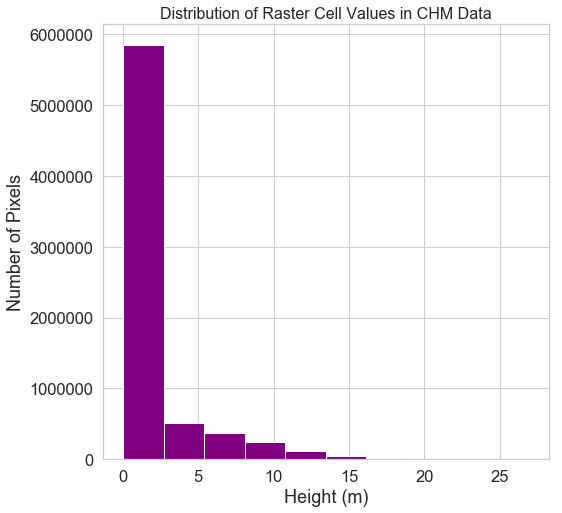

In [6]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.hist(lidar_chm_im.ravel(), 
       color = 'purple', 
       edgecolor = 'white')
ax.set_title("Distribution of Raster Cell Values in CHM Data", 
            fontsize = 16)
ax.set(xlabel = "Height (m)", 
      ylabel = "Number of Pixels");

Histogram of Canopy Height Model values

#### Explore Raster Histograms

Further explore your histogram, by constraining the x axis limits using the xlim and ylim arguments. The lims arguments visually zooms in on the data in the plot. It does not modify the data.

You might also chose to adjust the number of bins in your plot. Below you plot a bin for each increment on the x axis calculated using:

range(*xlim)

You could also set bins = 100 or some other arbitrary number if you wish

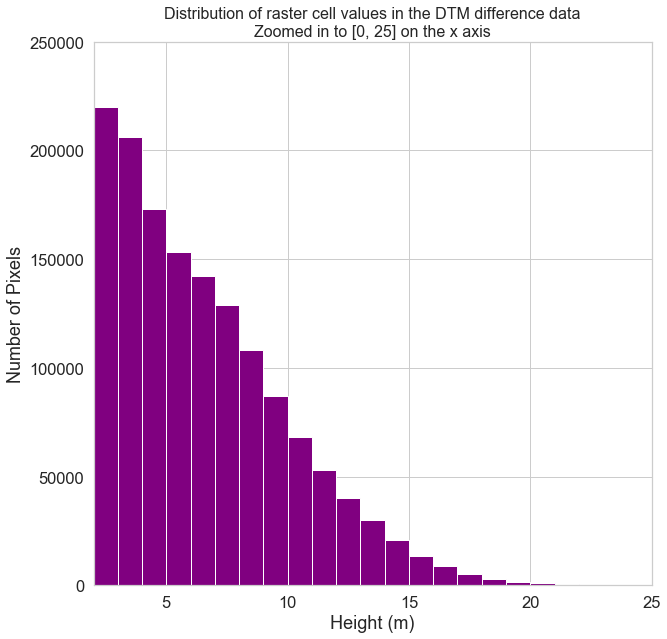

In [7]:
# histogram
fig, ax = plt.subplots(figsize = (10, 10))
xlim = [0, 25]
ax.hist(lidar_chm_im.ravel(), 
       color = 'purple', edgecolor = 'white', range = xlim, 
       bins = range(*xlim))
ax.set(ylabel = "Number of Pixels", xlabel = "Height (m)", 
      xlim = [2, 25], ylim = [0, 250000]);
ax.set_title("Distribution of raster cell values in the DTM difference data\nZoomed in to {} on the x axis".format(xlim),
            fontsize = 16);

Histogram of CHM data zoomed in to 0-25 on the x axis.

You may want to play with the distribution of breaks. Below it appears as if there are many values close to 0. In the case of this lidar instrument, you know that values between 0 and 2 meters are not reliable (you know this if you read the documentation about the NEON sensor and how these data were processed). Let’s create a bin between 0-2.

You know you want to create bins for short, medium and tall trees so let’s experiment with those bins also.

Below following breaks are used:

- 0 - 2 = no trees
- 2 - 7 = short trees
- 7 - 12 = medium trees
- `>` 12 = tall trees

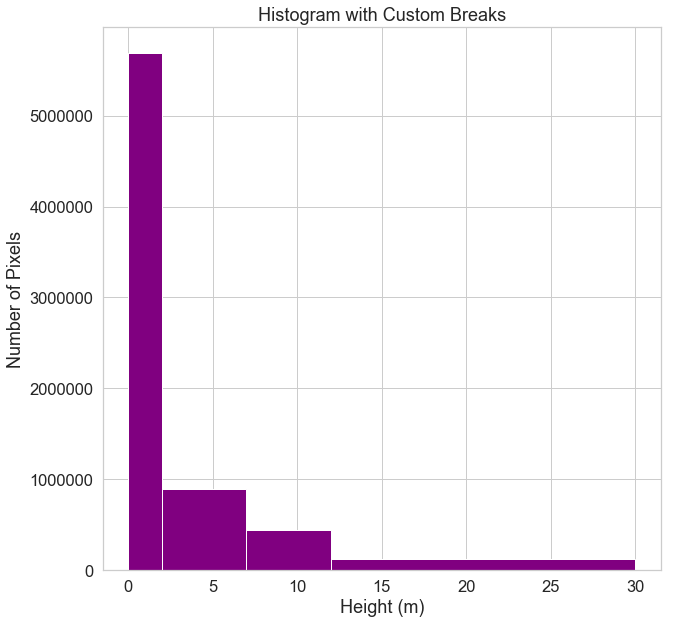

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(lidar_chm_im.ravel(), 
       color = 'purple', 
       edgecolor = 'white', 
       bins = [0, 2, 7, 12, 30])
ax.set(title = "Histogram with Custom Breaks", 
      xlabel = "Height (m)", 
      ylabel = "Number of Pixels");

Histogram with custom breaks applied.

You may want to play around with the setting specific bins associated with your science question and the study area. Regardless, let’s use the classes above to reclassify our CHM raster.

# Up to Map Raster Values to New Values